In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf

In [3]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable([[-0.5, -0.2],
                 [-0.3,  0.4],
                 [-0.5,  0.2]])
b = tf.Variable([[0.1, 0.2]])

XWb = tf.matmul(X,W) + b
y = tf.nn.relu(tf.matmul(X,W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:');print(sess.run(XWb))
    print('y:');print(sess.run(y ))

XWb:
[[-0.35999998  0.28      ]]
y:
[[0.   0.28]]


In [4]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable([[-0.5, -0.2],
                 [-0.3,  0.4],
                 [-0.5,  0.2]])
b = tf.Variable([[0.1, 0.2]])

XWb = tf.matmul(X,W) + b
y = tf.nn.sigmoid(tf.matmul(X,W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:');print(sess.run(XWb))
    print('y:');print(sess.run(y ))

XWb:
[[-0.35999998  0.28      ]]
y:
[[0.41095957 0.5695462 ]]


In [6]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4, 0.2, 0.4]])
XWb = tf.matmul(X,W) + b
y = tf.nn.relu(tf.matmul(X,W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('b:');print(sess.run(b))
    print('W:');print(sess.run(W))
    print('y:');print(sess.run(y))

b:
[[-0.1907966  0.784022 ]]
W:
[[-0.12933241 -0.0624697 ]
 [-1.6880594  -0.31410137]
 [ 0.7264882   0.20199339]]
y:
[[0.         0.77701116]]


In [7]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4, 0.2, 0.4]])
XWb = tf.matmul(X,W) + b
y = tf.nn.relu(tf.matmul(X,W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    (_b, _W, _y) = sess.run((b, W, y))
    print('b:');print(_b)
    print('W:');print(_W)
    print('y:');print(_y)

b:
[[ 0.8017679  -0.12955335]]
W:
[[-0.7008054   0.5924679 ]
 [-0.71132165 -1.0333825 ]
 [-0.7167722  -0.0654652 ]]
y:
[[0.09247249 0.        ]]


In [8]:
ts_norm = tf.random_normal([1000])
with tf.Session() as session:
    norm_data = ts_norm.eval()
print(norm_data[:5])

[ 0.8136602  -0.00246645 -0.62607604  1.0386015   0.03441418]


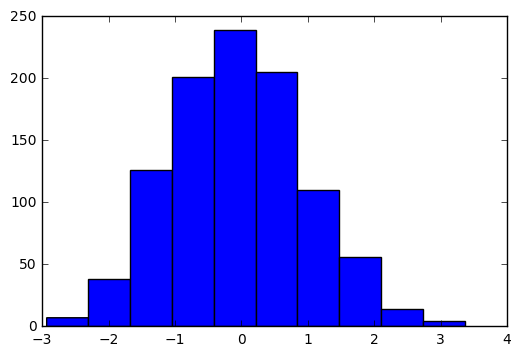

In [9]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

In [14]:
import numpy as np
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder('float', [None, 3])
XWb = tf.matmul(X,W) + b
y = tf.nn.relu(tf.matmul(X,W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4]])
    (_b, _W, _X, _y) = sess.run((b, W, X, y), feed_dict={X:X_array})
    print('b:');print(_b)
    print('W:');print(_W)
    print('X:');print(_X)
    print('y:');print(_y)

b:
[[0.19547802 0.5112217 ]]
W:
[[ 0.02229689  0.8510339 ]
 [ 1.5612221  -1.4209867 ]
 [-1.0310345   0.8862294 ]]
X:
[[0.4 0.2 0.4]]
y:
[[0.10422739 0.9219297 ]]


In [15]:
import numpy as np
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder('float', [None, 3])
XWb = tf.matmul(X,W) + b
y = tf.nn.relu(tf.matmul(X,W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4],
                        [0.3, 0.4, 0.5],
                        [0.3,-0.4, 0.5]])
    (_b, _W, _X, _y) = sess.run((b, W, X, y), feed_dict={X:X_array})
    print('b:');print(_b)
    print('W:');print(_W)
    print('X:');print(_X)
    print('y:');print(_y)

b:
[[-0.724982   0.8993741]]
W:
[[ 1.594218   0.1515714]
 [ 1.0859189  0.3540855]
 [-2.2606964  0.5793524]]
X:
[[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y:
[[0.        1.2625607]
 [0.        1.376156 ]
 [0.        1.0928875]]


In [19]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs,W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [20]:
X = tf.placeholder('float', [None,4])
h = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3, inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_X, layer_h, layer_y) = sess.run((X, h, y), feed_dict={X:X_array})
    print('input Layer X:');print(layer_X)
    print('hidden Layer h:');print(layer_h)
    print('output Layer y:');print(layer_y)

input Layer X:
[[0.4 0.2 0.4 0.5]]
hidden Layer h:
[[0.        0.6753937 0.       ]]
output Layer y:
[[-1.0576943  1.3158002]]


In [21]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs,W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs, W, b

In [23]:
X = tf.placeholder('float', [None,4])
h,W1,b1 = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y,W2,b2 = layer(output_dim=2, input_dim=3, inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_X, layer_h, layer_y, W1, b1, W2, b2) = sess.run((X, h, y,W1, b1, W2, b2), feed_dict={X:X_array})
    print('input Layer X:');print(layer_X)
    print('W1:');print(W1)
    print('b1:');print(b1)
    print('hidden Layer h:');print(layer_h)
    print('W2:');print(W2)
    print('b2:');print(b2)
    print('output Layer y:');print(layer_y)

input Layer X:
[[0.4 0.2 0.4 0.5]]
W1:
[[-0.47048452 -0.8385195   0.22892667]
 [ 0.2692515   1.7744298   1.1040077 ]
 [ 0.44773653  1.2183825   2.1337118 ]
 [ 0.74123937  0.8012173   1.0913132 ]]
b1:
[[ 2.6601648  2.2482257 -1.2232368]]
hidden Layer h:
[[3.0755355  3.1556654  0.48827672]]
W2:
[[ 1.697458    0.68895334]
 [-2.4198139  -0.13809206]
 [-1.2002529   1.1568033 ]]
b2:
[[-0.19366351  1.4188627 ]]
output Layer y:
[[-3.1952493  3.666831 ]]
